In [1]:
import nltk
import os
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [2]:
path_to_gs= "C:/Users/Gaurav/gs9.52/bin"

In [3]:
os.environ['PATH']+=os.pathsep+path_to_gs

In [20]:
sent = "The mouse ate the fresh cheeze"

In [21]:
sent_tokens = nltk.pos_tag(word_tokenize(sent))

In [22]:
sent_tokens

[('The', 'DT'),
 ('mouse', 'NN'),
 ('ate', 'VBD'),
 ('the', 'DT'),
 ('fresh', 'JJ'),
 ('cheeze', 'NN')]

In [23]:
grammar_np = r"NP: {<DT>?<JJ>*<NN>}"

In [24]:
chunk_parser = nltk.RegexpParser(grammar_np)

In [25]:
chunk_result = chunk_parser.parse(sent_tokens)

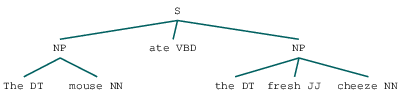

In [26]:
chunk_result

In [27]:
sent2 = 'She is wearing a beautiful dress'

In [28]:
sent_tokens2 = nltk.pos_tag(word_tokenize(sent2))

In [29]:
sent_tokens2

[('She', 'PRP'),
 ('is', 'VBZ'),
 ('wearing', 'VBG'),
 ('a', 'DT'),
 ('beautiful', 'JJ'),
 ('dress', 'NN')]

In [30]:
chunk_result2 = chunk_parser.parse(sent_tokens2)

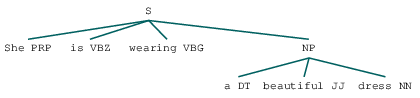

In [31]:
chunk_result2

In [32]:
grammar_vp = r"vp: {<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>?}"

In [33]:
chunk_parser2 = nltk.RegexpParser(grammar_vp)

In [34]:
sent3 = "She walks quickly to the mall"

In [35]:
sent_tokens3 = nltk.pos_tag(word_tokenize(sent3))

In [36]:
sent_tokens3

[('She', 'PRP'),
 ('walks', 'VBD'),
 ('quickly', 'RB'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('mall', 'NN')]

In [37]:
chunk_result3 = chunk_parser2.parse(sent_tokens3)

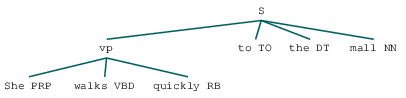

In [38]:
chunk_result3

In [39]:
chink_grammar = r"""
cn:
{<PRP>?<VB|VBD|VBZ|VBG>*<RB|RBR>?}
}<RB>+{
"""

In [40]:
chink_parser = nltk.RegexpParser(chink_grammar)

In [41]:
sent_tokens3

[('She', 'PRP'),
 ('walks', 'VBD'),
 ('quickly', 'RB'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('mall', 'NN')]

In [42]:
chink_result1=chink_parser.parse(sent_tokens3)

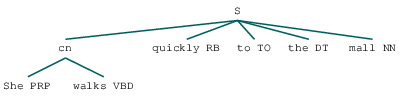

In [43]:
chink_result1

In [44]:
CFG_grammar = nltk.CFG.fromstring("""
S -> NP VP
VP -> V N
NP -> "John"|"Jim"
V -> "saw"|"met"
N -> "dog"|"cat"
""")

In [45]:
from nltk.parse.generate import generate

In [47]:
for sentence in generate(CFG_grammar):
    print(" ".join(sentence))

John saw dog
John saw cat
John met dog
John met cat
Jim saw dog
Jim saw cat
Jim met dog
Jim met cat


In [48]:
CFG_grammar.productions()

[S -> NP VP,
 VP -> V N,
 NP -> 'John',
 NP -> 'Jim',
 V -> 'saw',
 V -> 'met',
 N -> 'dog',
 N -> 'cat']

In [55]:
def cfg_parse(sentence):
    sent_tk = nltk.pos_tag(word_tokenize(sentence))
    print(sent_tk)
    for pair in sent_tk:
        if pair[1]=='NNP':
            s_NP = "\'"+pair[0]+"\'"
        if pair[1]=='VBD' or pair[1]=='VBN':
            s_V = "\'"+pair[0]+"\'"
        if pair[1]=='NN':
            s_N = "\'"+pair[0]+"\'"
    
    cfg_grammar2 = nltk.CFG.fromstring("""
    S -> NP VP
    VP -> V N
    NP -> {}
    V -> {}
    N -> {}
    """.format(s_NP, s_V, s_N))
    print()
    for sentence in generate(cfg_grammar2):
        print(" ".join(sentence))

In [56]:
cfg_parse("John saw a long white boat")

[('John', 'NNP'), ('saw', 'VBD'), ('a', 'DT'), ('long', 'JJ'), ('white', 'JJ'), ('boat', 'NN')]

John saw boat


In [57]:
cfg_parse('A cat was seen by John')

[('A', 'DT'), ('cat', 'NN'), ('was', 'VBD'), ('seen', 'VBN'), ('by', 'IN'), ('John', 'NNP')]

John seen cat


In [59]:
cfg_parse('A Cat was seen by john')

[('A', 'DT'), ('Cat', 'NNP'), ('was', 'VBD'), ('seen', 'VBN'), ('by', 'IN'), ('john', 'NN')]

Cat seen john
